# Importing Libraries

In [1]:
import torch
from torch.optim import Adam
from torch import nn, utils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Gathering and Organizing the data


The dataset used in the "Neural Networks and Deep Learning" by Michale Nielsen was organized as a zip of tuples
each tuple of length 2 represents: as the first element a 2d ndarray with (784, 1) shape, which represents a flattened (28x28) image,
the second element a nd array with (10, 1) which represents the value (the digit represented) of that image input,
the index where the number 1 is placed is the correct output
Given this context, we are not going to use the dataset given in the book, we've chosen to proceed using the mnist dataset from pytorch datasets.


In [2]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()

# Load datasets for both training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_test = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)

100%|██████████| 9912422/9912422 [00:00<00:00, 95215622.75it/s]


Extracting /tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 9850032.02it/s]


Extracting /tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24775176.42it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1340642.42it/s]

Extracting /tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



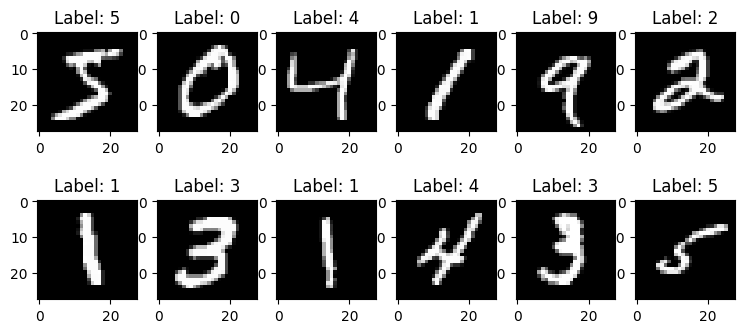

In [3]:
# Checking the dataset

cols = 6
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))

for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training[i]
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap='gray')  # remove first dimension, hence it its a (1, 28, 28) tensor

plt.show()

# MLP class

Arquitetura de Rede Neural Perceptron Multicamadas (MLP)

In [4]:
class MLP(nn.Module):

  def __init__(self, num_classes):
    super().__init__()
    self.num_classes = num_classes

    self.net = nn.Sequential(
      nn.Flatten(),
      nn.LazyLinear(512), nn.ReLU(),
      nn.LazyLinear(128), nn.ReLU(),
      nn.LazyLinear(self.num_classes)
    )

  def forward(self, x):
    return self.net(x)


In [ ]:
#tensors shape summarizer function
def layer_summary(net, input_shape):
  X = torch.randn(*input_shape)
  for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [7]:
model = MLP(10)
layer_summary(model.net, (1, 1, 28, 28))

# Instance of the model, the optmizer, loss
model = MLP(10)
opt = Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training with batches of 128
batch_size = 128
train_loader = utils.data.DataLoader(mnist_training, batch_size=batch_size, shuffle=True)


Flatten output shape:	 torch.Size([1, 784])
Linear output shape:	 torch.Size([1, 512])
ReLU output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 128])
ReLU output shape:	 torch.Size([1, 128])
Linear output shape:	 torch.Size([1, 10])


### Preparing our training parameters

### Training

In [8]:
losses = []

for epoch in range(10): # Number of Epochs
  for imgs, labels in train_loader:
    predictions = model(imgs)
    loss = loss_fn(predictions, labels)

    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()

    losses.append(float(loss))

  print(f"Epoch {epoch}: Loss = {float(loss)}")

Epoch 0: Loss = 0.16531896591186523
Epoch 1: Loss = 0.12232004851102829
Epoch 2: Loss = 0.058780089020729065
Epoch 3: Loss = 0.008665387518703938
Epoch 4: Loss = 0.05066337808966637
Epoch 5: Loss = 0.00563065567985177
Epoch 6: Loss = 0.05804400146007538


KeyboardInterrupt: ignored

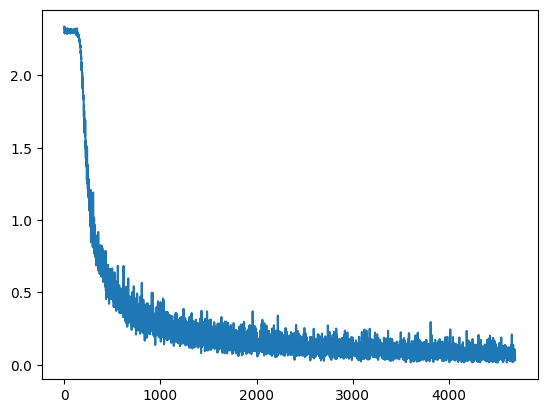

In [ ]:
plt.plot(losses)

### Testing out its accuracy on the validation data

In [ ]:
batch_size_test = 10000
test_loader = utils.data.DataLoader(mnist_test, batch_size=batch_size_test)

# Image tensor has shape (10000, 1, 28, 28)
imgs, labels = next(iter(test_loader))

# Calculates the results for all the images, returning us a tensor of shape (10000, 10)
# imgs[i][j] => i -> image; j -> the score for that number [0-1]
predictions = model(imgs)

# For each row determine the columns with the highest score, the prediction
predicted_classes = torch.argmax(predictions, dim=1)

# Accuracy -> correct predictions / all predictions
print(sum(predicted_classes.numpy() ==  labels.numpy()) / batch_size_test)


0.9772


# Referencies

This notebook is based on the books: "Dive into deep learning" by Aston Zhang,
Zack C. Lipton, Mu Li and Alex J. Smola, "Neural Networks and Deep Learning" by Michael Nielsen.